# Discovering dark matter in a computer

## Setup imports and data loading

In [19]:
# Import libraries required for this exercise
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# If you install astropy, you can use their units and constants to make your code more readable
# and facilitate the conversion of units. You can install astropy by running 'pip install astropy'
if (False):
    from astropy import units as u # A library allowing you to define units for your variables
    from astropy import constants as const # A library containing a useful set of physical constants

# A data loading function that receives a path and a list of files, and returns a dictionary with the data loaded
def load_data(path, file_names, all_data={}):
    for file_name in file_names:
        all_data[file_name.replace(".npy","")] = np.load(path+file_name)
    return all_data

# Let's setup the path to our datasets and load the data into memory
array_path="../day_3/data/"
file_names = ['mass1_solar_mass.npy','mass2_solar_mass.npy','mass3_solar_mass.npy','HI_vphi_kmps.npy','HI_mass_solar_mass.npy']
all_data = load_data(array_path, file_names)


Before we proceed further, pre-processing our data to make our lives easier down the line may be a good idea. 

Unfortunately, the data we imported from numpy does not have any unit management functionality.
Therefore, it may be useful to define the units of the data we loaded. For this, we can use the astropy library, which allows us to define units for our variables as follows

In [20]:

if (False):
    # An example would be to assign solar_masses to the mass array:
    if not hasattr(all_data['mass1_solar_mass'],'unit'):
        all_data['mass1_solar_mass'] = all_data['mass1_solar_mass']*u.solMass
    ic(all_data['mass1_solar_mass'].unit)

Note that in the example above, we performed an in-place operation on our data. This is risky, and if we are certain that we can afford the additional memory, we could simply separate the information into two arrays, one with units functionality and another one without.

However, this requires careful manipulation of any future updates, and if we are memory limited (as we would be, if we employed the full simulation resolution), it would become very expensive memory-wise. As a result, for in-place operations such as the above in interactive notebooks such as this one, it is good practice to implement checks so that we do not perform operations an incorrect number of times.

In [21]:
# Consider including units in your data now. This will make keeping up with units much easier later on

### Computation functions

Some example functions that you can use for this work are included in this notebook then whey are first needed. Ideally, such functionalities could be implemented in a separate file that we would import here, but we'll keep everything in the same file in this activity to facilitate linearity. 

# Dataset information

A few things that may be useful in your calculations below:
- The size of the cubic boxes you have received is 60 kpc per full side. 
- Each of the files imported (and the all_data corresponding key) contains the units of each quantity
- The *normalised* angular momentum direction (determining the rotation of the galaxy) is in (x,y,z) coordinates: (-0.35029992, 0.66230279, 0.66230279)

# A first exploration of the dataset

## Imaging

### Data slicing

In post-processing analysis of large datasets and simulations, half the battle is to visualise the data
in a way that is meaningful and informative. For cases such as this, where we are dealing with 3D data representing
physical dimensions, we can use projections to visualise representative images of the data.

We will get started with a very simple example of a slice projection of the gas density

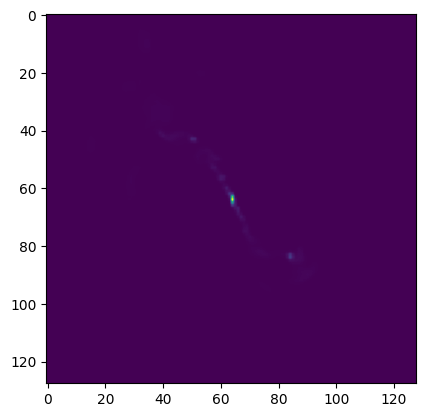

In [22]:

# Let's start by generating a projection of the gas density in the x-direction. We can
# use imshow directly on a 2D slice of our 3D array to do this:
usevar= "mass2_solar_mass"
slice = all_data[usevar][int(all_data[usevar].shape[2]/2),:,:]
plt.imshow(slice)


A few tips for your plotting below:

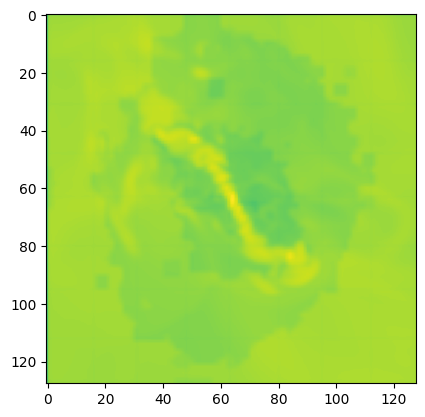

In [23]:
# Astronomical data varies over many orders of magnitude, so it is often useful to explore using a logarithmic scale
plt.imshow(slice, norm=LogNorm())

Furthermore, as we are investigating multiple variables for the same system, it will be useful to generate side-by-side plots
A dummy example of how to do this is shown below. You can use this as a template for generating your own plots, and extend
it by including loops, keys, functions, etc.

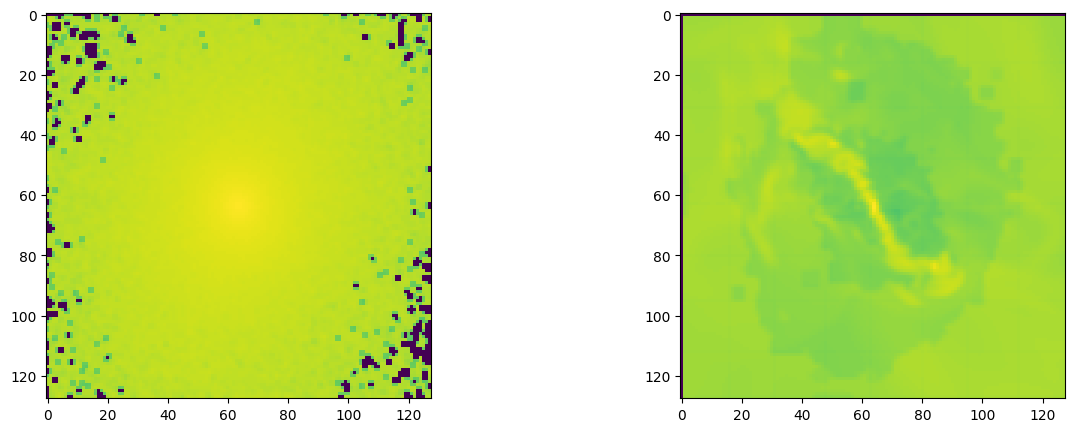

In [24]:

usevar1= "mass1_solar_mass"
usevar2= "mass2_solar_mass"
slice1 = all_data[usevar1][int(all_data[usevar1].shape[2]/2),:,:]
slice2 = all_data[usevar2][int(all_data[usevar2].shape[2]/2),:,:]
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(slice1, norm=LogNorm())
axs[1].imshow(slice2, norm=LogNorm())

Finally, while python is extremely powerful when generating plots, its default images are not particularly appealing. 
Others have noticed this before, and developed useful packages that you can use to very quickly improve the quality of your figures!
A useful example that wraps around the main plotting functions we are using here is this one prettypyplot: https://pypi.org/project/prettypyplot/

Check it out, you may want to use it instead of the pyplot defaults!

### First projections - task 1

While data slices are useful, they are not always the most informative way to visualise 3D data.
A more informative way to visualise 3D data is to generate projections along a given axis, and plot these projections
as 2D images. This way you can see the distribution of the data in a more informative way.

Let's generate a plot with investigating the three masses you have loaded in the all_data dictionary.
You can use the project_3D_array function to generate the projections, and imshow to plot them.
raise NotImplementedError("Please generate a plot with three panels showing the projections of the three arrays")

Once you have done the tasks above, we should polish the plots a bit further. This will help us to generate more informative plots,
which are easier to interpret. A few tips for your plotting below:

- Set axes labels: 

`axs[i].set_xlabel("X-axis label")`

`axs[i].set_ylabel("Y-axis label")`

- You can set a plot title for each panel. It is useful in the context of a first analysis, 
but bear in mind that this is generally not used in scientific publications

`axs[i].set_title("Title")`

- You can set the colour map of the plot. Perceptually uniform colour maps are generally appropriate, such as inferno, viridis, etc.

`axs[i].set_cmap("inferno")`

- You can set the limits of the colour map to a range that is meaningful for your data.
Think carefully about what you want to show in your plot, and adjust the limits accordingly.
You may also want to automatise the process, perhaps by setting the limits to a range around the average value of the projection

`axs[i].set_clim(vmin, vmax)`

- You can include colourbars in your plots to provide a scale for the data. A simple example of how to include a colourbar in a plot is

`fig.colorbar(axs[i].imshow(projection, norm=LogNorm(vmin=mmin, vmax=mmax), cmap='inferno'), ax=axs[i], orientation='horizontal')`

<span style="color: olive;">Some tasks and questions to address:</span>
- Generate projections for the three main mass components received (mass1, mass2, mass3), along the different box axes.
- Include useful information to aid in the interpretation of your figures.
- Can you identify the galaxy in your images?

### Imaging support function

In [25]:
# A function that receives an array, a direction, and a weight (optional), and integrates along a received direction to generate a projection
def project_3D_array(array_3d, idir, array_3d_weight=None):
    
    if array_3d_weight is not None: # Whenever we received a weight array, 
        # we need to compute the weighted projection instead of a simple integration
        
        # Remember the weighted projection is computed as:
        # the sum of the array multiplied by the weight divided by the sum of the weight
        projection = np.sum(array_3d*array_3d_weight, axis=idir) / np.sum(array_3d_weight, axis=idir)  # Adjusted to compute average projection
    
    else: # Whenever we do not receive a weight array, we compute a simple integration
        projection = np.sum(array_3d, axis=idir)

    return projection

In [26]:
# :> Please address tasks and questions above at this point

print(project_3D_array(all_data, 0))

{'mass1_solar_mass': array([[[7.21385909e-22, 1.27259045e-15, 1.12793293e-06, ...,
         9.74149299e-16, 1.45448495e-15, 2.93259284e-09],
        [7.21385909e-22, 1.39833367e-09, 1.03127405e+03, ...,
         1.12708121e-09, 9.11452326e-19, 1.15160143e-15],
        [7.21385909e-22, 9.44070017e-13, 6.46428729e-04, ...,
         7.83487394e-07, 2.05746553e-12, 3.25779825e-09],
        ...,
        [1.27625088e-09, 8.73408494e-16, 1.11767373e-09, ...,
         9.19793359e+03, 9.24171094e+03, 5.51541699e+03],
        [2.98663428e+03, 7.94331015e-07, 4.43407366e-10, ...,
         5.62365400e-03, 3.88817466e-03, 2.45169946e-03],
        [3.95057349e+03, 5.96671947e-04, 2.70455908e-10, ...,
         2.64961897e-09, 2.55697397e-09, 2.58022359e-09]],

       [[7.21385909e-22, 7.46204800e-19, 7.37221626e-07, ...,
         1.98556883e-12, 2.86118438e-06, 7.40254736e+03],
        [7.21385909e-22, 1.05582286e-12, 1.60247314e+00, ...,
         5.96555648e-03, 1.85315574e-09, 1.44863588e-09],
    

I got to here by 4/9/2024.

I didn't work with anyone today. 

I would score my participation a 7/10. 

Today's lecture was fascinating and extraordinarily motivating in terms of learning about the applications of such numerical techniques. I wish I got more time to work on the notebook which seems engaging and challenging. Hopefully I'll get more time to work on it later in the week.

### Identifying the galaxy and its components - task 2

You may have noticed already that identifying the galaxy within the received projections is not trivial. One of the problems
we are encountering is that the projections include a large column of mass that is not part of the galaxy. This is due to the
projection function integrating along the entire axis

Let us solve this problem by extending the projection function so that it receives a minimum and maximum value across the projection
axis, and ignores all values outside of this range. This will allow us to focus on the galaxy itself.

<span style="color: olive;">Some tasks and questions to address:</span>
- Extend the project_3D_array function to generate a 'thick slice' projection, where cells outside a received region of interest are not included.
- You have received three main massive components of the galaxy. These corresponds to baryonic (gas and stars), and dark matter. Using your projections, can you identify each of them? What is the reasoning for your answers?
- **Extra:** As the galaxy is formed in a full cosmological simulated 'universe', its disk does not necessarily align (and it doesn't!) with the axes of the box. We could extend our projection function so that it receives a line-of-sight and projects our galaxy along that direction. If we provided the axis of rotation, this would generate flat images of the disk.

In [27]:
# :> Please address tasks and questions above at this point

## Radial profiling

### Density profile of each component - task 3

Please write the text for the students here, for the profiling section:

In this section, we will generate radial profiles of the main galaxy components. 
The radial profile is a useful tool to investigate the distribution of a given quantity as a function of the distance from the centre of the galaxy.
These quantities can be compared with observations to infer the physical properties of the galaxy, such as its mass distribution, globally as well as per component.

To generate profiles, we will have to implement a radial_profile function that will take a 3D array and generate a radial profile from a given centre.
You can find a template for this function in the code above, and you will need to complete it to generate the radial profiles of the galaxy components.

You can then use the ax.plt function to plot the radial profiles of the galaxy components. It has multiple variants, depending on whether
you want to plot linear or logarithmic scales, error bars, etc. The main ones you can use here are:

`plt.plot: for simple line plots. Usage: plt.plot(x_values, y_values)`

`plt.semilogy: for logarithmic y-axis plots. Usage: plt.semilogy(x_values, y_values)`

`plt.loglog: for logarithmic x and y-axis plots. Usage: plt.loglog(x_values, y_values)`

To polish your graphs, you can use the functions we discussed above and 

`ax.set_xlim and ax.set_ylim to set the limits of the x and y axes. Usage: ax.set_xlim([xmin, xmax]) and ax.set_ylim([ymin, ymax])`

<span style="color: olive;">Some tasks and questions to address:</span>
- Implement the radial_profile function so that it generates radially integrated profiles of a received 3D array
- Once you have a working version of this function, ensure you extend it so that the x axis values (radial distance) are in physical units. Remember: the size of the box is 60 kpc.
- Once you have generated your first profiles, do you observe any weird artifacts? Where do they appear? Can we correct for them, or should we discard the corresponding data?
- An integrated mass profile is hard to interpret physically. A larger volume will lead to a larger integrated mass. Let's convert the mass profiles to density profiles.
- Describe the trends and behaviours you found for each of the components. Which one dominates at each distance? What could be the physical cause?

### Profiling support function

In [28]:
# A function that receives a 3D array and generates a radial distance profile from a received centre (defaults to the centre of the array)
# if a second array is provided, it will be used as a weight for the radial profile. If none is provided, the profile is integrated
def radial_profile(array_3d, lbox, x0=None, array_3d_weight=None):
    if x0 is None:
        # If no x0 is provided, we will use, e.g. the centre of the array
        # raise NotImplementedError ("It may be useful to implement a default x0 computation for the radial profile")
        x0 = np.array(array_3d.shape) / 2

    # We can generate a 3D grid of distances from the centre as follows
    y, x, z = np.indices(array_3d.shape)
    
    # Next we need to compute the radial distance from the centre
    raise NotImplementedError ("Radial distance computation not implemented yet")

    # Convert the radii according to the received size of the cube represented by the array
    raise NotImplementedError ("Conversion of radii to physical units not implemented yet")
    
    # Now generate a radial binning, and a vector of values that contain the mass integral of the radial profile
    # Some useful functions are:
    # np.arange: generates a range of values. Usage: result = np.arange(start, stop, step)
    # np.zeros: generates an array of zeros. Usage: result = np.zeros(shape)
    # np.rint: rounds to the nearest integer. Usage: result = np.rint(array)
    # This next one is particularly useful for vectorising and generalising profiling tasks
    # np.argmin: returns the index of the minimum value in an array. Usage: result = np.argmin(array)
    raise NotImplementedError ("Radial binning and radial profile generation not implemented yet")

    
    return radial_bins, quantity_radial_profile

In [29]:
# :> Please address tasks and questions above at this point

# Measuring the mass of galaxies through their kinematics

## Making rotation curve predictions to probe the existence of dark matter - task 4

The theory:

The rotation curve of a galaxy is a measure of the rotational velocity of the galaxy as a function of the distance from the centre of the galaxy.
Such rotation curves are a powerful tools to measure the mass of galaxies: they allows us to measure the mass
of the galaxy at different radii. 
The physical principle behind this is that the mass of the galaxy is the source of the gravitational force that keeps their mass in orbit:
this is true for their gas, their stars and their dark matter. In the absence of this rotation, all this mass would 
collapse into the centre of the galaxy.

The rotation curve can be used to measure the mass of the galaxy using the following equation: 
$$v_{\text{circ}} = \sqrt{\frac{G M (< r)}{r}}$$
Here, G is the gravitational constant, r is the distance from the centre of the galaxy,
and M is the mass of the galaxy within that distance.

Using the massive components of our galaxy, we can obtain predictions for the expected rotation of our galaxy.

Let us now generate the circular velocity profile for the galaxy using a new function and the mass profiles
we obtained before. 


<span style="color: olive;">Some tasks and questions to address:</span>
- Implement a new circular_velocity_profile function that receives vectors for the radial bins and the mass inside each of them and returns the predicted circular velocity
- Generate a radial profile of the circular velocity predicted by each component of the galaxy. Which one dominates? 
- In astrophysics, kinematics are a powerful probe of system properties, as they induce observable Doppler modifications in observable light. This is in fact what Vera Rubin (e.g., Rubin & Ford, 1970) used to measure the mass of galaxies, and make some unprecedented discoveries. Let us double check her work now: 
    - Compute a circular velocity profile as predicted solely by the baryonic mass (gas + stars; without dark matter).
    - Compute a circular velocity profile as predicted for the baryonic mass + dark matter mass.
- Can our two predictions (i.e., with and without dark matter) be distinguished? Where and how can they be distinguished? What is the best measurement to distinguish galaxies with and without dark matter (review your mass profiles above to support your statement)?

### Physics processing functions

In [30]:
# A function that converts a radial mass profile into a profile of the circular velocity
def circular_velocity_profile(r, radial_profile):
    raise NotImplementedError ("Circular velocity profile computation not implemented yet")
    return circular_velocity_profile

In [31]:
# :> Please address tasks and questions above at this point

## Measuring the actual rotational velocity (or rotation curve) of our simulated galaxy

### Exploring the HI rotation curve of our galaxy I: HI data - task 4

Now that we are equipped with theoretical predictions for the circular velocity profile that will aid us in determining
the presence of dark matter in the system, let us proceed to measure the rotation curve of the system.

We will specifically employ the HI (neutral hydrogen, in gaseous form in the galaxy medium) rotation curve, which is a common tracer of the rotation of galaxy disks.

This part of the analysis will illustrate how, despite the access to all the information being available in simulations, careful
processing is required to obtain products that can be compared with observations.

As you may have noticed, you have loaded information about the HI mass and the HI rotation velocity in the system. The velocity
is an intensive quantity, equally well defined in regions of very high density and very low density. Observationally, the high
density regions are observable due to the presence of HI, while the low density regions are not. This means that the HI mass
is a good tracer of the regions where the rotation curve can be measured. Consequently, we will have to process our large 3D cube of 
HI velocities to generate information of the rotation curve in a manner analogous to that of observations. 

<span style="color: olive;">Some tasks and questions to address:</span>
- Let us first explore the HI dataset to ensure we understand it. Generate projections of the HI mass and the HI $v_{\phi}$ (rotational velocity). How does the HI mass compare with the other components (especially with the total gas mass)? What are the main features of the HI rotation map?
- As described above, the HI velocity is not a quantity of interest in every point. In the previous bullet point, you may have already noticed that the HI rotation map is not making much sense being integrated. This is because integrating an intensive quantity is not well-defined. Instead, we want to collapse this information employing some weighting. Let us extend our projection routine now to receive a weighting array. 
    - Generate a map of the HI velocity using the HI mass array as weights (mass-weighted).
    - Generate a map of the HI velocity using an array of ones as weights (volume-weighted). You can use np.ones(HI_mass_array).
- What are the differences between the mass-weighted and volume-weighted images? Which one do you think makes more sense to compare with observations?

In [32]:
# :> Please address tasks and questions above at this point


### Exploring the HI rotation curve of our galaxy II: HI rotation curve - task 5

Almost there! As a final step, we can generate a HI mass-weighted profile of the HI rotational velocity, and compare it with our predictions

<span style="color: olive;">Some tasks and questions to address:</span>
- Extend your radial_profile function so that it can compute an average profile, weighted with a received array.
- Compute the HI rotational velocity profile, using the HI vphi array information and the HI mass as a weight.
- Compare the resulting profile with your predictions for the circular velocity with and without dark matter (you can plot them in the same panel to facilitate comparison).
- Does dark matter exist?
- Load the rotational curve observed for NGC6503 and compare it with our simulated galaxy. NGC6503 has a comparable stellar mass and stellar component size, so it provides a good analogue. Its main difference is that it features a more massive central spheroidal component (a spherical concentration of stars towards the centre of the galaxy). Does the observed data agree with our simulation, or is the real Universe incorrect?

In [33]:
# :> Please address tasks and questions above at this point

# **Very extra** - Measuring the star formation rate of our galaxy (SFR) 

### The Galaxies Main Sequence - extra 1 

If you got this far and are still curious, firstly, I am very impressed! There are a couple more (very interesting!) things we can do with this dataset. 

We can focus especifically in investigating the star formation rates of the galaxy. This are powerful observables that allow us to compare different galaxies,
and determine many of the galaxy properties: galaxy luminosity (young stars are brighter), galaxy colour (young stars are bluer), galaxy morphology (star formation is
associated with spiral arms), etc. Something I have been curious about in my own research but haven't had much time to investigate is the resolved Kennicutt-Schmidt (KS) relation.
This relation associates the SFR with the surface density of a galaxy, which are both quantities that can be observed with relative ease to constrain our theoretical models.

You can start investigating how does the KS model dictate star formation in your galaxy, first a global level.
For this, we can compute the SFR of the entire galaxy as a whole, and compare it with its stellar mass. This relation is known as the main sequence of galaxies.

<span style="color: olive;">Some tasks and questions to address:</span>
- Compute the total stellar mass of your galaxy, $M_{star}$
- Implement a function that compute the SFR for each given cell of your galaxy. You can use the KS formula:
$$\rho_{SFR} = \epsilon \frac{\rho_{gas}}{t_{ff}}$$
$$t_{ff} = \sqrt{\frac{3\pi}{32G\rho_{gas}}}$$
- Compute the total SFR of your galaxy. You can assume a typical value of the star formation efficiency $\epsilon = 0.05$. How does this compare with the observed values of the galaxies main sequence?
- Let us now apply a density threshold: it is well established that stars are only formed in dense regions. A value of $10^{-22} g / cm^3$ is a good point to get started. 

In [34]:
# :> Please address tasks and questions above at this point

### The Kennicutt-Schmidt relation - extra 2

Really, still more? Ok, let us compute the Kennicutt-Schmidt relation for our galaxy

<span style="color: olive;">Some tasks and questions to address:</span>
- Create a function that computes the surface density of a quantity (i.e., the amount of mass per pixel, in units of e.g., $g / cm^2$). Note that this can be done pretty much through the projection functions you created above. 
- Compute the gas surface density and the SFR surface density. Generate a scatter graph for $\Sigma_{SFR}$ vs $\Sigma_{gas}$ where each pixel of the image is a point. You can explore how projecting across different axes of the received dataset affects your results.
- You can compare your results with observations of the KS relation (e.g., Bigiel+2008 or Kennicutt 1998).
- Great, now do this for a couple other of our simulations with different physics (how do different magnetic field strengths affect star formation? what is the effect of cosmic rays and/or radiation on the resolved star formation in the interstellar medium of galaxies?), write a scientific paper and publish it in a astrophysics journal!

In [35]:
# :> Please address tasks and questions above at this point